# KIN 482D: Computational modeling of human sensorimotor control and learning

## Gaffin-Cahn et al (2019), perturbation detection, and marginalization

### Start at whiteboard

Discuss:
- Modeling goal
- Models
- A little bit of signal detection theory and $d'$

&nbsp;
<center><img src="images/fig1-gaffin-cahn.png" width=750></center>

### Marginalization (from Appendix B)

- *Marginalization* refers to the procedure of obtaining from a joint distribution over multiple variables the distribution over a subset of those variables. 
- For example, if $p(x, y)$ is the joint distribution of $X$ and $Y$, then summing over $Y$ produces the distribution of $X$ alone:
$$\sum_y p(x,y) = p(x)$$
$$\text{Or, in the continuous case:}$$
$$\int p(x,y)dy=p(x)$$


### Marginalization Example

What is the probability your cat is present or absent regardless of your dog? What is the probability your dog is present or absent regardless of your cat? 

<center><img src="images/tableB-1.png" width=600></center>

### Marginalization (continued)
- We saw it before in the denominator of Bayes' Rule: 
$$P(x_\text{obs}) = p(x_\text{obs}, s) = \sum_s p(x_\text{obs}|s)p(s)$$
- Procedure is called marginalization because $p(x)$ and $p(y)$ are considered the marginals of $p(x,y)$. 
- If you think of $(x, y)$ as a point in 2-D space, and the joint distribution providing values in the z-axis (i.e., coming out of the page), then the marginals are the distributions obtained by summing in either dimension. 
- This results in two one-dimensional distributions that live int he "margins" of the original 2-D distribution. 
<img src="images/figB-6.png" width=750>

### A coding walkthrough of marginalization

In [1]:
import matplotlib.pyplot as plt
import numpy as np

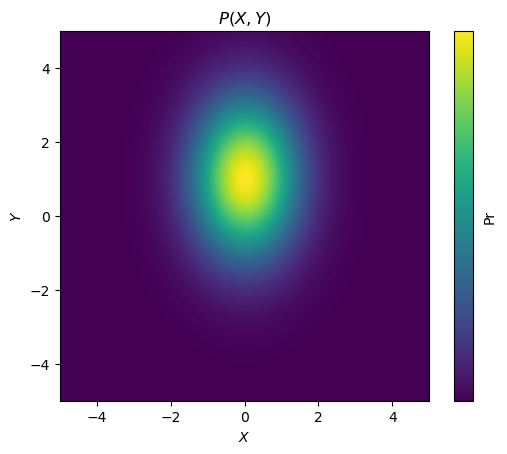

In [2]:
# Vectors containing range of values for RVs X and Y
X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.05)

# Probability distribution parameters
muX = 0
muY = 1
sigmaX = 1
sigmaY = 1.5

# Single variable distributions
pX = np.exp(-(X - muX)**2 / (2 * sigmaX**2))
pY = np.exp(-(Y - muY)**2 / (2 * sigmaY**2))

# Take outer product of 1-D distributions to get joint distributions of X and Y
joint = np.outer(pY, pX)
joint /= np.sum(joint)  # Normalize

# Plot
fig, ax = plt.subplots()
extent = [-5, 5, -5, 5]
ci = ax.imshow(joint, origin="lower", extent=extent)
cbar = fig.colorbar(ci, ax=ax, label="Pr")
cbar.set_ticks([])
ax.set(xlabel="$X$", ylabel="$Y$", title="$P(X, Y)$")
plt.show()

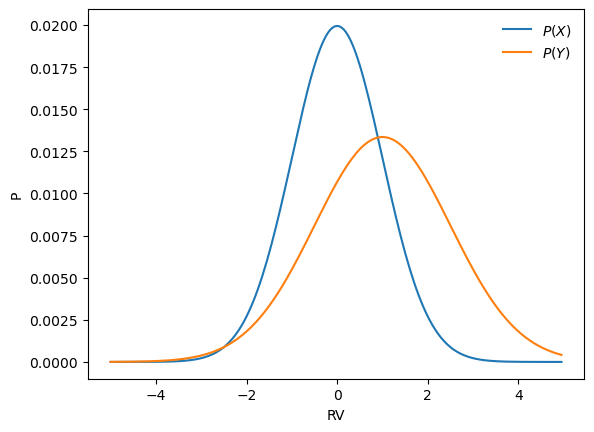

In [3]:
# Compute marginal distributions of one variable by summing over the other
X_marg = joint.sum(axis=0)
Y_marg = joint.sum(axis=1)

# Plot the marginal distributions of X and Y in same figure
fig, ax = plt.subplots()
ax.plot(X, X_marg, label="$P(X)$")
ax.plot(Y, Y_marg, label="$P(Y)$")
ax.set(xlabel="RV", ylabel="P")
ax.legend(frameon=False)
plt.show()

### Why marginalization is important

- Allows you to solve lots of problems - we frequently only care about a subset of variables
- Allows you to properly deal with "nuisance" variables
- Commonplace within Bayesian models - in reality, any model with a layer in between the world state and measurements
- Will sometimes need it to compute denominator of Bayes' Rule

### For Wednesday (3/27)

- Finish up Gaffin-Cahn (if necessary)
- Review problem set 6
- Project work